In [20]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'datasetg/trainingg'
valid_path = 'datasetg/testg'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('datasetg/trainingg/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('datasetg/trainingg',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasetg/testg',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=(210//32),
  validation_steps=(60//32))

Epoch 1/5
6/6 [==============================] - 46s 8s/step - loss: 2.0736 - accuracy: 0.6404 - val_loss: 1.7801 - val_accuracy: 0.5938
Epoch 2/5
6/6 [==============================] - 42s 7s/step - loss: 0.1462 - accuracy: 0.9382 - val_loss: 1.4872 - val_accuracy: 0.6071
Epoch 3/5
6/6 [==============================] - 43s 7s/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 1.7091 - val_accuracy: 0.5938
Epoch 4/5
6/6 [==============================] - 45s 7s/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 1.0044 - val_accuracy: 0.6429
Epoch 5/5
6/6 [==============================] - 43s 7s/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 1.1353 - val_accuracy: 0.8125


In [34]:
from keras.preprocessing import image
import numpy as np
test_image = image.load_img('datasetg/single_prediction/image4.png',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
training_set.class_indices
print(result)
if result[0][0] == 1:
    prediction = 'apple'
    print(prediction)
else:
    prediction = 'not apple'
    print(prediction)

[[1. 0.]]
apple


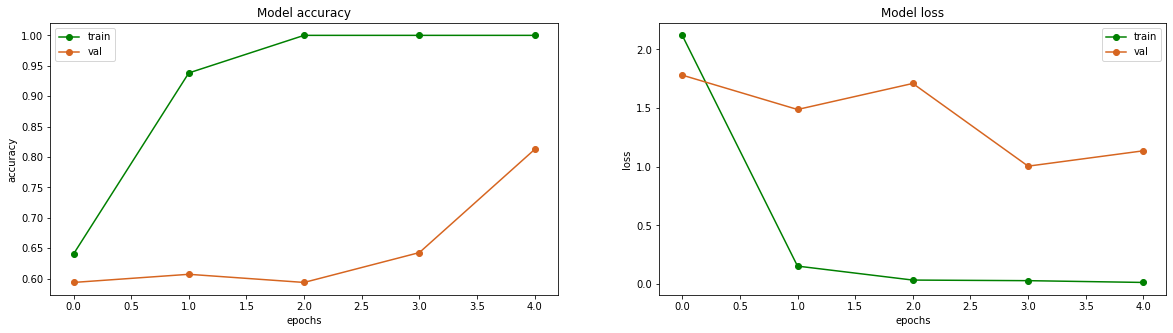

In [30]:
fig1,ax1 = plt.subplots(1,2,figsize = (20,5))
    
for i,j in enumerate(['accuracy','loss']):
    ax1[i].plot(r.history[j],'o-',color = 'green')
    ax1[i].plot(r.history['val_'+j],'o-',color = '#D66520')
    ax1[i].set_title('Model '+str(j))
    ax1[i].set_xlabel('epochs')
    ax1[i].set_ylabel(j)
    ax1[i].legend(['train','val'])

In [22]:
model.evaluate_generator(test_set)

[1.299720048904419, 0.800000011920929]